In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [100]:
train_df = pd.read_csv('train.csv')
train_df.head()

test_df = pd.read_csv('test.csv')
#plt.scatter(feature,y_train[:800])

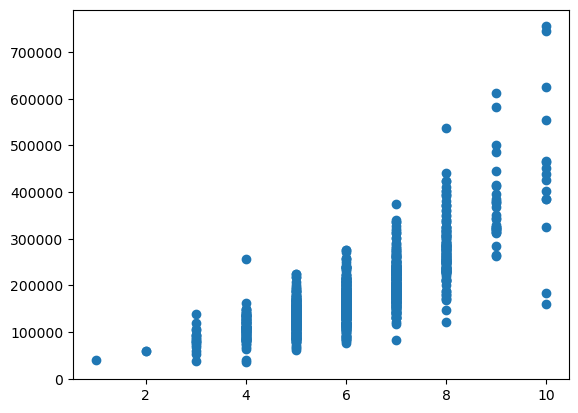

In [4]:
feature_1 = train_df.iloc[:, 0]
sale_price = train_df.iloc[:, -1]

no_of_X_columns = len(train_df.columns)-1

X_train_df = train_df.loc[:, train_df.columns[:len(train_df.columns)-1]]
y_train_df = train_df.loc[:, train_df.columns[-1]]

X_train = np.array(X_train_df)
y_train = np.array(y_train_df)

plt.scatter(feature_1, sale_price)

In [97]:
def z_score_normalize(X):
    mean = np.mean(X)
    std = np.std(X)
    X_norm = (X - mean)/std
    return X_norm

X_norm = z_score_normalize(X_train)
y_norm = z_score_normalize(y_train)
print(X_norm)

[[-0.98495578  1.21368348 -0.99223203 ... -0.98374307  1.3410178
   1.3713355 ]
 [-0.98495578  1.00267232 -0.99223203 ... -0.98495578  1.36042113
   1.3713355 ]
 [-0.9873812   0.60247874 -0.99101932 ... -0.98616849  1.34586863
   1.43318359]
 ...
 [-0.9873812  -0.03661827 -0.99223203 ... -0.9873812   1.36891008
   1.3713355 ]
 [-0.98616849  1.02086294 -0.99223203 ... -0.98374307  1.37739904
   1.42712006]
 [-0.98495578  0.75527993 -0.99101932 ... -0.9873812   1.41984381
   1.41984381]]


In [98]:
def mse(y_true, y_pred):
    n = len(y_true)
    cost = np.sum((y_true - y_pred)**2) / (2*n)
    return cost

def gradient(X, y, w, b):
    n, m = X.shape
    dw = np.zeros(m)
    db = 0

    for i in range(n):
        y_pred = np.dot(w, X[i]) + b
        error = y_pred - y[i]

        for j in range(m):
            dw[j] += error * X[i][j]
        db += error

    dw = dw / n
    db = db / n

    return dw, db

def update_parameters(w, b, dw, db, alpha):
    w = w - alpha * dw
    b = b - alpha * db

    return w, b

epochs = 4500
learning_rate = 0.1

w = np.zeros(X_norm.shape[1])
b = 0

for epoch in range(epochs):
    dw, db = gradient(X_norm, y_train, w, b)
    w, b = update_parameters(w, b, dw, db, learning_rate)

    if epoch % 100 == 0:
        print(f"Epoch {epoch}: MSE = {mse(y_train, np.dot(X_norm, w) + b)}")
        print(w, b)

Epoch 0: MSE = 2265795432.398181
[-17858.99810074  19025.53487304 -17959.93642579  -6213.0636162
   7841.42464072   9881.3030398  -17966.10751604 -17851.93402603
  25468.34701032  25714.41191654] 18122.359160958902
Epoch 100: MSE = 1138901485.18177
[-11852.71369001  59278.24228454 -12167.81032113  36219.67839253
  34475.03023244  18826.52664956 -12260.02026792 -12172.88231982
  25359.06307195  22784.46232214] 12448.146905699918
Epoch 200: MSE = 1090625983.849402
[-11230.67204705  59141.06479902 -11750.68577438  54856.88077356
  35980.46705289   9946.47918573 -11896.73070757 -11874.66936289
  31093.86780483  26449.76547827] 12126.942099177952
Epoch 300: MSE = 1069290021.6043135
[-10351.65277866  58275.59205305 -11078.63344046  66954.03357177
  37261.7961449    4688.92627673 -11261.51002399 -11302.29936485
  35899.0758969   29454.8274631 ] 11527.492428839421
Epoch 400: MSE = 1059151776.2556401
[ -9273.6274002   57589.98549136 -10208.9636031   74799.92261561
  38015.47594661   1473.969985

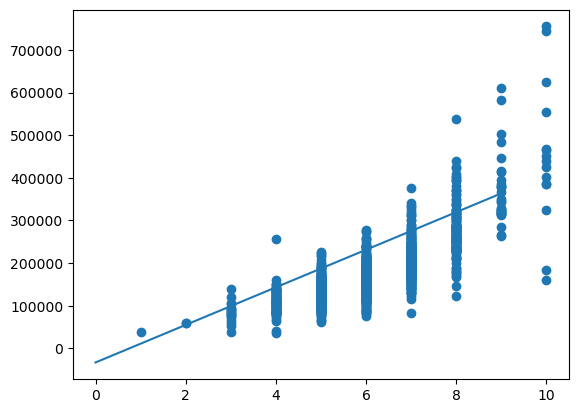

In [99]:
x = np.arange(0, max(train_df.iloc[:, 0]))
y = w[0]*x + b
plt.plot(x,y)
plt.scatter(train_df.iloc[:, 0], sale_price)

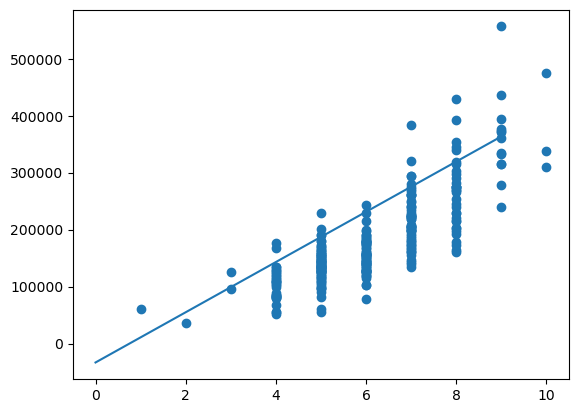

In [104]:
x = np.arange(0, max(test_df.iloc[:, 0]))
y = w[0]*x + b

sale_price_y = test_df.iloc[:, -1]

plt.plot(x,y)

plt.scatter(test_df.iloc[:, 0], sale_price_y)